# Automatical Utility Frauds Detector
Traditional ways of detecting the utility frauds are dependent on manual meters checking.  The frauds behavior of tampering with meters to get lower consumption readings would display 3 features: declining consumption trend, line loss index and terminal alert index. <br/>
Data: Data are from the metering records and historical fraud records. Entities are mainly grouped as: industrial, residencial, algriculture, commercial and nonresidential. After analyzing the data distribution and periodic patterns, we can excludes the nonresidential entities.<br/>
### The goal of this Automatical Utility Frauds Detector model:
1, analyze and generalize the features of utility frauds;<br/>
2, model and recognize the entities of utility frauds;<br/>
3, diagonize and predict the utility frauds in real-time style. <br/>

In [1]:
'''
Data processing
There are some missing value in the utility consumption records. 
Simply deleting those data will cause the erroneous electricity output and thus lead to error of line loss computation.
For the purpose of detecting frauds, we use the Lagrange method to interpolate those missing values.
Explain: (https://en.wikipedia.org/wiki/Lagrange_polynomial)
'''

from IPython.display import display, HTML
display(HTML('''<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/6e2c3a2ab16a8723c0446de6a30da839198fb04b">'''))

In [2]:
import pandas as pd
from scipy.interpolate import lagrange
import numpy as np

In [3]:
filemissing = './missing_data.xls'
processedfile = './missing_data_processed.xls'

In [4]:
data = pd.read_excel(filemissing, header = None)

In [5]:
data.head()

,0,1,2
0,235.8333,324.0343,478.3231
1,236.2708,325.6379,515.4564
2,238.0521,328.0897,517.0909
3,235.9063,NaN,514.8900
4,236.7604,268.8324,NaN


In [6]:
# col is each column in data, k is the position of missing value, 
# n denotes choosing 5 numbers before and after respectively.
def interpolate(col, k , n = 5):
    f = col[list(range(k-n, k))+list(range(k+1, k+n+1))]
    f = f[f.notnull()]
    return lagrange(f.index, list(f))(k)
 # lagrange(x_array, y_array) will return the lagrange polynomial equation.   

In [7]:
for i in data.columns:
    for j in range(len(data)):
        if (data[i].isnull())[j]:
            data[i][j] = interpolate(data[i], j)

In [8]:
data.head()

,0,1,2
0,235.8333,324.034300,478.323100
1,236.2708,325.637900,515.456400
2,238.0521,328.089700,517.090900
3,235.9063,203.462116,514.890000
4,236.7604,268.832400,493.352591


In [9]:
data.to_excel(processedfile, header=None, index = False)

In [10]:
# get the tidy index data, split into train and test datasets.
data = pd.read_excel('./model.xls')
from random import shuffle
data.head()

,Declining consumption trend,Line loss rate,Alert index,Fraud
0,4,1,1,1
1,4,0,4,1
2,2,1,1,1
3,9,0,0,0
4,3,1,0,0


In [11]:
data = data.as_matrix()
shuffle(data)
p = int(0.8*len(data))
train = data[:p, :] # 80% data as train data
test = data[p:, :] # 20% data as test data

In [12]:
'''
Build the Neural Network model.
'''
from keras.models import Sequential
from keras.layers import Dense, Activation

Using TensorFlow backend.


In [13]:
data

array([[4, 1, 1, 1],
       [4, 0, 4, 1],
       [4, 0, 4, 1],
       ..., 
       [3, 0, 0, 0],
       [4, 0, 0, 0],
       [1, 0, 3, 0]])

In [14]:
# creat the Neural Nework model
NN = Sequential()
# use the rectifier (relu) activation function on the first two layers 
# and the sigmoid activation function in the output layer. 
NN.add(Dense(10, input_dim=3, activation = 'relu'))  
NN.add(Dense(1, activation ='sigmoid')) 

In [ ]:
#complie the model
NN.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [37]:
# train the model 200 times
NN.fit(train[:, :3], train[:, 3], nb_epoch = 200, batch_size= 1)

Epoch 1/200
232/232 [==============================] - 0s - loss: 0.1576 - acc: 0.9612     
Epoch 2/200
232/232 [==============================] - 0s - loss: 0.1528 - acc: 0.9612     
Epoch 3/200
232/232 [==============================] - 0s - loss: 0.1544 - acc: 0.9569     
Epoch 4/200
232/232 [==============================] - 0s - loss: 0.1502 - acc: 0.9612     
Epoch 5/200
232/232 [==============================] - 0s - loss: 0.1557 - acc: 0.9569     
Epoch 6/200
232/232 [==============================] - 0s - loss: 0.1518 - acc: 0.9569     
Epoch 7/200
232/232 [==============================] - 0s - loss: 0.1594 - acc: 0.9526     
Epoch 8/200
232/232 [==============================] - 0s - loss: 0.1530 - acc: 0.9569     
Epoch 9/200
232/232 [==============================] - 0s - loss: 0.1478 - acc: 0.9526     
Epoch 10/200
232/232 [==============================] - 0s - loss: 0.1547 - acc: 0.9569     
Epoch 11/200
232/232 [==============================] - 0s - loss: 0.1510 - acc

In [38]:

# predict returns probability, so choose classes
predict_result = NN.predict_classes(train[:, :3]).reshape(len(train)) 

 32/232 [===>..........................] - ETA: 0s

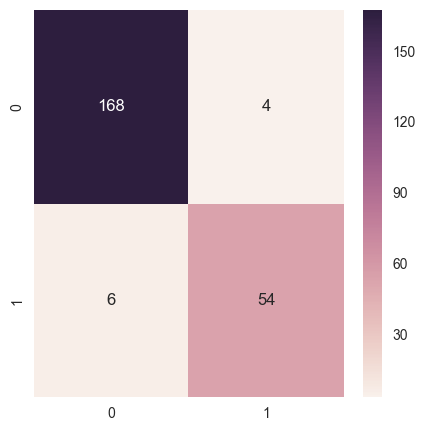

In [39]:
# plot the confusion Matrix
import seaborn as sn
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(train[:, 3], predict_result)
df_cm = pd.DataFrame(cm)
plt.figure(figsize = (5,5))
sn.heatmap(df_cm, annot=True, fmt='g') # fmt: string format to avoid 3 digit number be scientific notation
sn.plt.show()

In [40]:
print df_cm

     0   1
0  168   4
1    6  54


In [41]:
# Decision Tree CART
from sklearn.tree import DecisionTreeClassifier as DTC
x = train[:,:3]
y = train[:,3]
CART = DTC()
CART.fit(x, y)
result2 = CART.predict(x)

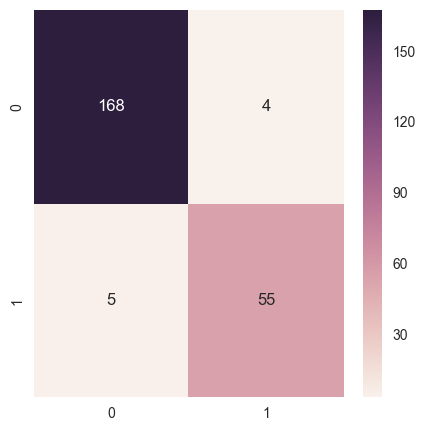

In [42]:
# plot the confusion Matrix of CART
cm2 = confusion_matrix(y, result2)
df_cm2 = pd.DataFrame(cm2)
plt.figure(figsize = (5,5))
sn.heatmap(df_cm2, annot=True, fmt='g') # fmt: string format to avoid 3 digit number be scientific notation
sn.plt.show()

In [43]:
print df_cm2

     0   1
0  168   4
1    5  55


In [44]:
# ID3
dtc = DTC(criterion = "entropy")
dtc.fit(x,y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [48]:
import pydotplus 
from sklearn import tree
import pydot
tree.export_graphviz(dtc, out_file="tree2.dot") 
(graph,) = pydot.graph_from_dot_file("tree2.dot")
graph.write_png("tree2.png") 

True

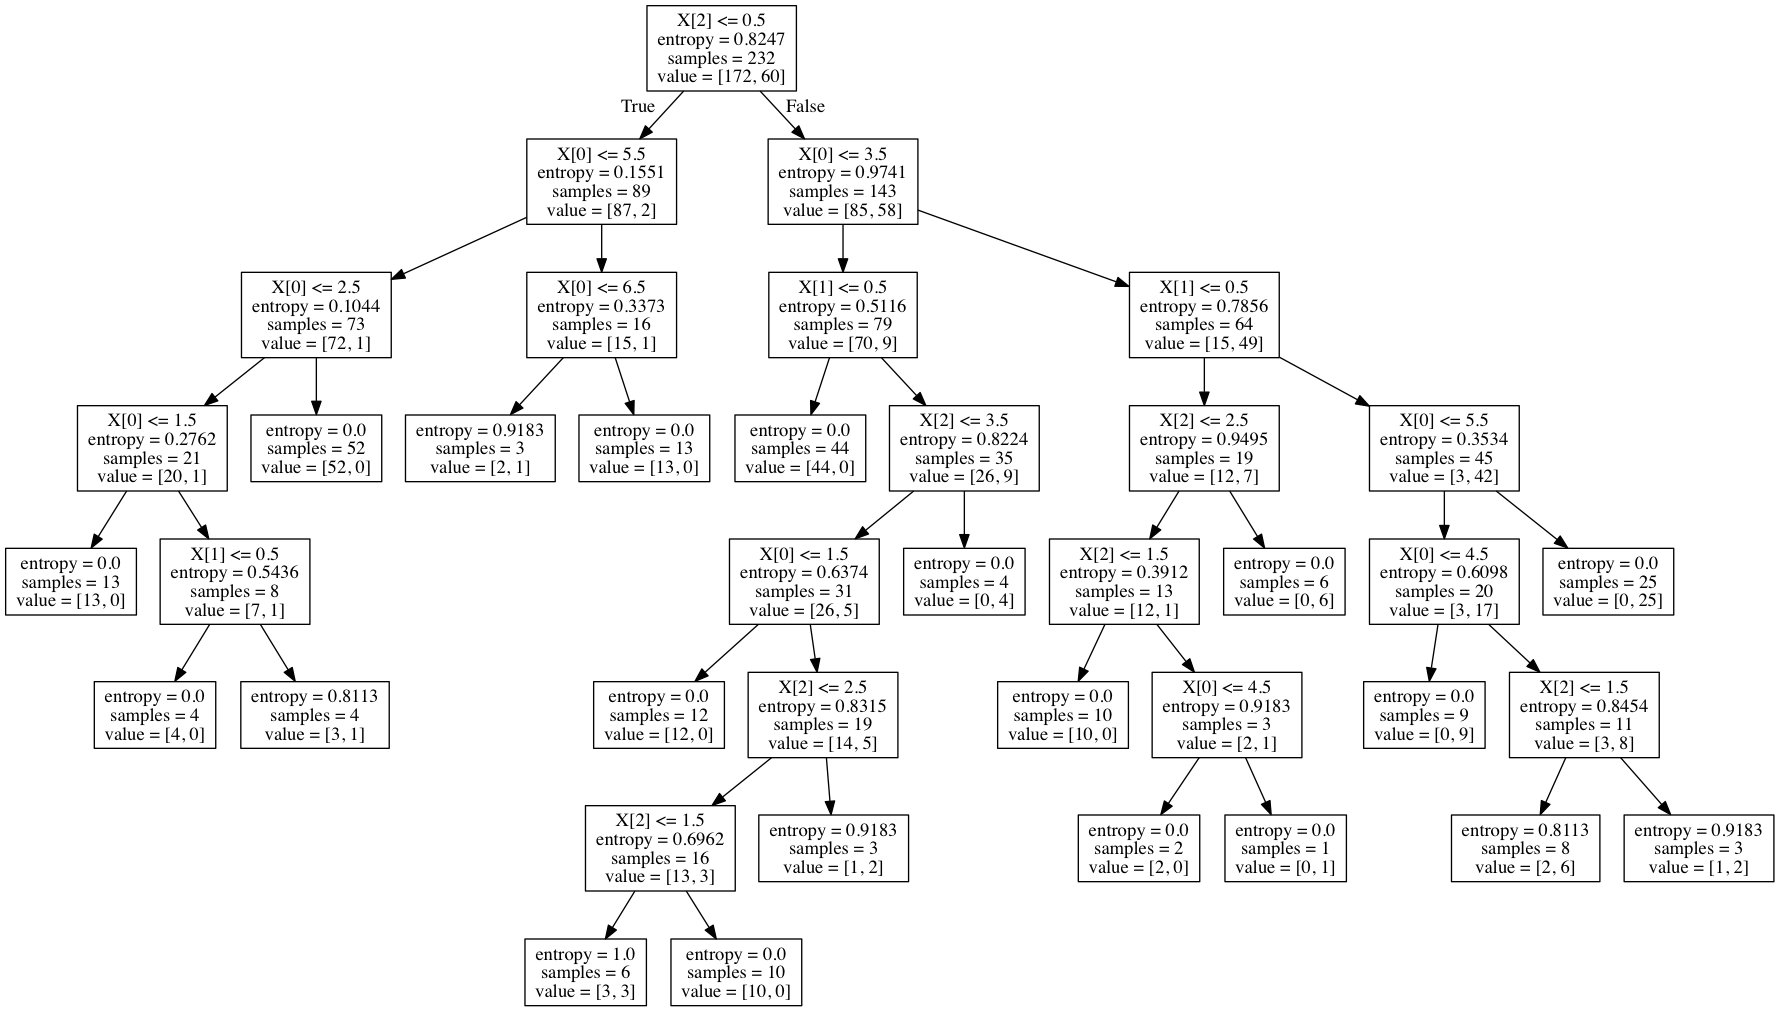

In [49]:
from IPython.display import Image
Image("tree2.png")

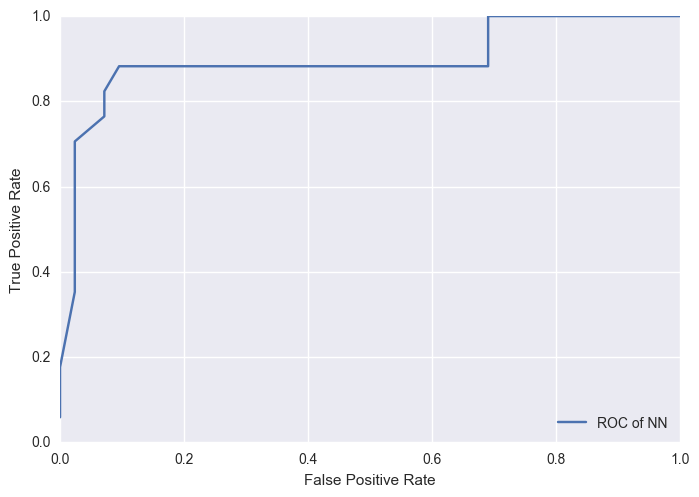

In [50]:
# Model Evaluation: Receiver Operating Characteristic
# ROC curve of NN model
from sklearn.metrics import roc_curve
predict_result_test1 = NN.predict(test[:, :3]).reshape(len(test))
fpr, tpr, thresholds = roc_curve(test[:,3], predict_result_test1, pos_label=1)
plt.plot(fpr, tpr, label = "ROC of NN")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc =4)
plt.show()

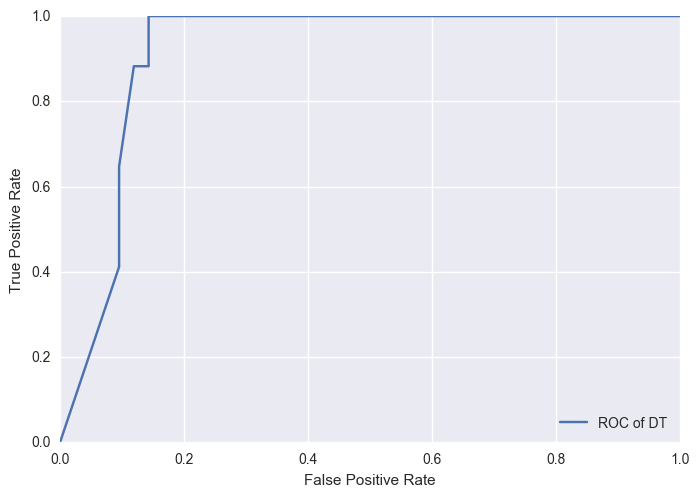

In [51]:
# ROC curve of Deciscion Tree model
from sklearn.metrics import roc_curve
prob = CART.predict_proba(test[:,:3])[:,1]
fpr, tpr, thresholds = roc_curve(test[:,3], prob, pos_label=1)
plt.plot(fpr, tpr, label = "ROC of DT")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc =4)
plt.show()

In [ ]:
'''
Evaluation of the NN and DT methods
As shown in the confusion matrix, both methods mistakenly label 4 innocent entities as frauds. 
There are 6 frauds that NN method did not capture and 5 frauds that the DT methods missed.
By comparing the ROC curve plots, we found the areas under curve of DT was bigger, 
which means DT model is more desirable for classifying and predicting the utility frauds here.
'''

In [ ]:
# Next step would target those wrong predict results. 
# More research is need to optimize the model and improve the precision.